ASSIGNMENT: REGRESSION-1

1.  Explain the difference between simple linear regression and multiple linear regression. Provide an 
example of each.

Simple linear regression and multiple linear regression are both statistical techniques used to model the relationship between a dependent variable and one or more independent variables. The main difference between these two techniques is the number of independent variables used in the analysis.

Simple linear regression involves modeling the relationship between a dependent variable and a single independent variable. The goal of simple linear regression is to find a linear relationship between the two variables that can be used to make predictions about the dependent variable based on the independent variable. An example of simple linear regression would be modeling the relationship between a person's weight and their height.

Multiple linear regression involves modeling the relationship between a dependent variable and two or more independent variables. The goal of multiple linear regression is to find a linear relationship between the dependent variable and multiple independent variables that can be used to make predictions about the dependent variable based on the independent variables. An example of multiple linear regression would be modeling the relationship between a person's salary and their education level, work experience, and age.

In both cases, the regression model involves fitting a line to the data points in a way that minimizes the sum of the squared errors between the observed data points and the predicted values from the model. However, multiple linear regression involves fitting a multi-dimensional hyperplane to the data points, rather than a simple line.

2. Discuss the assumptions of linear regression. How can you check whether these assumptions hold in 
a given dataset?

Linear regression is a widely used statistical technique to model the relationship between a dependent variable and one or more independent variables. However, to obtain accurate and reliable results from a linear regression analysis, several assumptions need to be met. Below are the main assumptions of linear regression:

Linearity: The relationship between the dependent variable and the independent variables is linear.

Independence: The observations are independent of each other.

Homoscedasticity: The variance of the errors is constant across all levels of the independent variable(s).

Normality: The errors are normally distributed with a mean of zero.

No multicollinearity: There is no high correlation among the independent variables.

To check whether these assumptions hold in a given dataset, one can use the following methods:

Scatter plots: To check linearity, scatter plots can be used to examine the relationship between the dependent variable and each independent variable. If the relationship appears to be non-linear, a non-linear regression model may be more appropriate.

Residual plots: To check homoscedasticity, residual plots can be used to examine whether the spread of the residuals is roughly constant across different levels of the independent variable(s).

Normal probability plots: To check normality, a normal probability plot of the residuals can be used to examine whether the residuals follow a normal distribution.

Variance Inflation Factor (VIF): To check multicollinearity, VIF can be used to measure the degree of correlation between independent variables. If VIF values are greater than 5, this suggests that there may be multicollinearity.

EXAMPLE:1

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the independent variable (number of hours studied)
hours = np.array([2, 5, 7, 8, 10, 12, 14, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

# Define the dependent variable (test scores)
scores = np.array([60, 70, 75, 80, 85, 90, 85, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100])

# Reshape the data to the required format for scikit-learn
X = hours.reshape(-1, 1)
y = scores.reshape(-1, 1)

In [11]:
# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients of the model
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: [67.70330254]
Coefficient: [[1.11426144]]


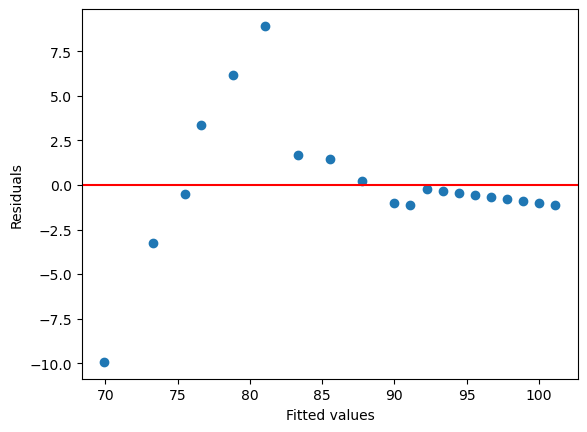

In [12]:
import matplotlib.pyplot as plt

# Make predictions on the data
y_pred = model.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Plot the residuals against the fitted values
plt.scatter(y_pred, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


If the plot shows a random scatter of points around zero without any pattern, then the linearity and normality assumptions are met. If there is a clear pattern in the residuals, then the linearity assumption is not met and you may need to consider a different model. If the plot is not symmetric around zero or has a clear pattern, then the normality assumption is not met and you may need to consider transforming the data or using a different model.

EXAMPLE:2

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Manually inputting the data
data = {'x1': [1, 2, 3, 4, 5],
        'x2': [3, 5, 6, 7, 8],
        'y': [7, 9, 13, 15, 18]}
df = pd.DataFrame(data)

In [15]:
df

,x1,x2,y
0,1,3,7
1,2,5,9
2,3,6,13
3,4,7,15
4,5,8,18


In [16]:
# Fitting the multiple linear regression model
model = LinearRegression()
model.fit(df[['x1', 'x2']], df['y'])

LinearRegression()

In [17]:
# Making predictions
y_pred = model.predict(df[['x1', 'x2']])

In [18]:
y_pred

array([ 7. ,  9.4, 12.3, 15.2, 18.1])

In [19]:

# Printing the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 3.4 -0.5]
Intercept: 5.100000000000007


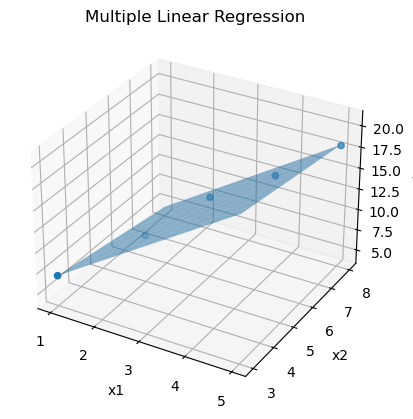

In [20]:
# Plotting the data and regression plane
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['x1'], df['x2'], df['y'])
x1_grid, x2_grid = np.meshgrid(np.linspace(df['x1'].min(), df['x1'].max(), 10),
                               np.linspace(df['x2'].min(), df['x2'].max(), 10))
y_grid = model.intercept_ + model.coef_[0] * x1_grid + model.coef_[1] * x2_grid
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Multiple Linear Regression')
plt.show()

3. How do you interpret the slope and intercept in a linear regression model? Provide an example using 
a real-world scenario.

In a linear regression model, the slope represents the change in the dependent variable (y) for a unit change in the independent variable (x). The intercept represents the value of the dependent variable (y) when the independent variable (x) is zero.

For example, let's consider a real-world scenario where we want to predict the monthly sales of a company based on their advertising spending and the number of employees. We can build a multiple linear regression model to predict the sales (y) using advertising spending (x1) and the number of employees (x2) as independent variables.

If the coefficients of the model are:

advertising spending (x1): 50
number of employees (x2): 100
intercept: 1000
We can interpret the model as follows:

For every unit increase in advertising spending, the monthly sales are expected to increase by $50, holding the number of employees constant.
For every additional employee, the monthly sales are expected to increase by $100, holding the advertising spending constant.
The expected monthly sales when the advertising spending and number of employees are zero is $1000.
Therefore, in this scenario, the slope coefficients represent the impact of each independent variable on the dependent variable, and the intercept represents the baseline value of the dependent variable when all independent variables are zero.

4. Explain the concept of gradient descent. How is it used in machine learning?

Gradient descent is an optimization algorithm used in machine learning to find the minimum of a cost function. In a typical machine learning problem, the objective is to find the model parameters that minimize the difference between the predicted output and the actual output, which is measured using a cost function or loss function.

Gradient descent is an iterative method that starts with an initial set of parameters and updates them iteratively to reach the minimum of the cost function. In each iteration, the algorithm calculates the gradient of the cost function with respect to the model parameters. The gradient is a vector that points in the direction of the steepest ascent of the cost function. The algorithm then updates the model parameters by taking a step in the opposite direction of the gradient. The step size is controlled by a learning rate parameter, which determines how fast the algorithm converges to the minimum.

The process is repeated until the algorithm reaches a convergence criterion, such as a small change in the cost function or a maximum number of iterations. The final set of parameters represents the optimal solution that minimizes the cost function.

Gradient descent is widely used in machine learning for parameter estimation in various models, such as linear regression, logistic regression, and neural networks. It allows us to optimize the model parameters efficiently and accurately even in high-dimensional spaces where analytical solutions are not feasible. However, gradient descent may converge slowly or get stuck in local minima if the cost function is not convex or has high curvature. In such cases, advanced optimization techniques, such as stochastic gradient descent or Adam optimization, can be used to improve the convergence speed and robustness of the algorithm.

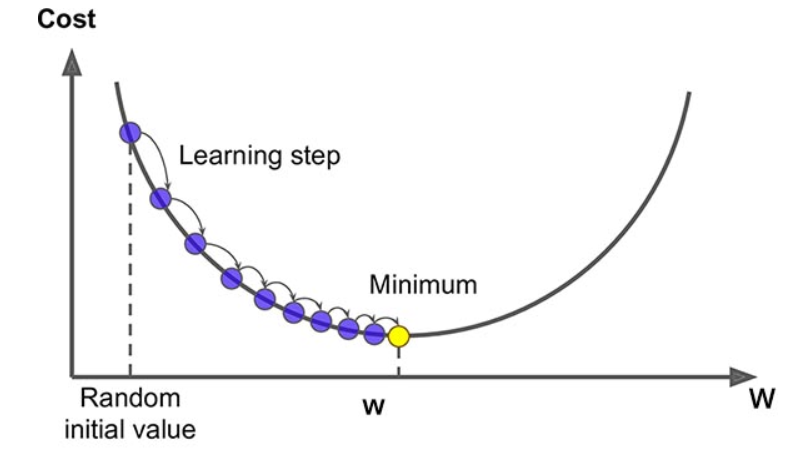

5.  Describe the multiple linear regression model. How does it differ from simple linear regression?

Multiple linear regression is a statistical technique used to predict a dependent variable based on two or more independent variables. It is an extension of simple linear regression, which only uses one independent variable.

In multiple linear regression, the model can be represented as:

Y = β0 + β1X1 + β2X2 + … + βnXn + ε

where Y is the dependent variable, X1, X2, …, Xn are the independent variables, β0 is the intercept or constant term, β1, β2, …, βn are the regression coefficients or slopes, and ε is the error term.

The regression coefficients in multiple linear regression represent the change in Y for a unit change in the corresponding independent variable, while holding all other independent variables constant. This is known as the partial effect of an independent variable on the dependent variable.

The multiple linear regression model can be used to analyze the relationship between the dependent variable and the independent variables, to make predictions and to identify the relative importance of the independent variables in explaining the variation in the dependent variable.

Compared to simple linear regression, multiple linear regression is more flexible as it allows for the analysis of the relationships between multiple independent variables and the dependent variable simultaneously. However, it also requires more assumptions and more data to ensure that the model is robust and reliable. Additionally, multiple linear regression models can be more complex and difficult to interpret, particularly when dealing with interactions between independent variables.

In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Creating a sample dataset
np.random.seed(123)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2 + 3*x1 + 4*x2 + np.random.normal(0, 1, 100)
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# Fitting multiple linear regression model
X = data[['x1', 'x2']]
X = sm.add_constant(X)
Y = data['y']
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1337.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           2.49e-71
Time:                        13:11:15   Log-Likelihood:                -138.58
No. Observations:                 100   AIC:                             283.2
Df Residuals:                      97   BIC:                             291.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9067      0.098     19.402      0.0

6.  Explain the concept of multicollinearity in multiple linear regression. How can you detect and 
address this issue?

Multicollinearity is a phenomenon that occurs when two or more independent variables in a multiple linear regression model are highly correlated with each other. This means that there is a high degree of linear relationship between the independent variables, which can lead to unreliable and unstable estimates of the regression coefficients.

One way to detect multicollinearity is to compute the correlation matrix between the independent variables. Correlation coefficients range from -1 to 1, where a value of 1 indicates perfect positive correlation, 0 indicates no correlation, and -1 indicates perfect negative correlation. If there are high correlations (e.g., greater than 0.7 or 0.8) between pairs of independent variables, this suggests multicollinearity may be present.

There are several ways to address the issue of multicollinearity:

Remove one of the correlated variables: If two or more independent variables are highly correlated, you can remove one of them from the model.

Combine the correlated variables: If the correlated variables are measuring the same underlying construct, you can create a new variable that is a weighted combination of the original variables.

Use regularization techniques: Regularization techniques, such as ridge regression or Lasso regression, can be used to shrink the regression coefficients and reduce the impact of multicollinearity.

Collect more data: Collecting more data can help reduce the impact of multicollinearity by providing a larger sample size and more variation in the independent variables.

7. Describe the polynomial regression model. How is it different from linear regression?

Polynomial regression is a type of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial. In contrast to linear regression, where the relationship is assumed to be linear (i.e., a straight line), polynomial regression allows for more complex, non-linear relationships between the variables.

The general form of a polynomial regression equation is:

y = b0 + b1x + b2x^2 + ... + bn*x^n

where y is the dependent variable, x is the independent variable, and b0, b1, b2, ..., bn are coefficients that are estimated from the data. The degree of the polynomial, n, determines the number of coefficients that need to be estimated.

Compared to linear regression, polynomial regression can capture more complex relationships between the variables. For example, if the relationship between x and y is curved, a polynomial regression model can fit a curve to the data rather than a straight line. However, polynomial regression can also be prone to overfitting, where the model fits the noise in the data rather than the underlying pattern.

One common approach to address this issue is to use regularization techniques, such as ridge regression or lasso regression, which penalize the magnitude of the coefficients to prevent overfitting. Additionally, cross-validation can be used to evaluate the performance of the model and select the appropriate degree of the polynomial.

8.  What are the advantages and disadvantages of polynomial regression compared to linear 
regression? In what situations would you prefer to use polynomial regression?

Advantages of polynomial regression compared to linear regression:

Can capture non-linear relationships between the independent and dependent variables.

Can fit a wider range of data patterns compared to linear regression.

Provides better accuracy in fitting non-linear data.

Disadvantages of polynomial regression compared to linear regression:

The complexity of the model increases as the degree of the polynomial increases, which can lead to overfitting.

Polynomial regression can be sensitive to outliers, especially at higher degrees.

In situations where the relationship between the independent and dependent variables is not linear, polynomial regression can be a good choice. For example, if the dependent variable increases with the independent variable but at an increasing rate, a polynomial model can better capture this relationship. However, if the relationship is linear or close to linear, linear regression may be more appropriate. It's also important to consider the complexity of the model and the potential for overfitting, and to perform model selection and validation techniques to ensure the best model is selected for the given data.